In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data_final/data.csv')
display(df)

,RideEstimativeID,RideID,ProductID,WaitingTime,Price,Selected,Fee,ProviderID,CategoryID,Description,...,weekday,hour,periodo,horario_pico,fim_de_semana,distance_km,distance_km_log,lead_time_log,distance_pico,week_pico
0,8619946,1183200,Flash,8,89.00,False,0.0,2,10,Flash,...,1,10,Manhã,0,0,21.306472,3.104877,-0.000240,0.0,1_0
1,8619947,1183200,UberX,6,89.00,False,0.0,2,2,UberX,...,1,10,Manhã,0,0,21.306472,3.104877,-0.000240,0.0,1_0
2,8619948,1183200,Comfort,10,116.50,False,0.0,2,9,Comfort,...,1,10,Manhã,0,0,21.306472,3.104877,-0.000240,0.0,1_0
3,8619949,1183200,poupa99,5,170.21,False,0.0,3,2,99POUPA,...,1,10,Manhã,0,0,21.306472,3.104877,-0.000240,0.0,1_0
4,8619950,1183200,pop99,7,170.21,False,0.0,3,2,99POP,...,1,10,Manhã,0,0,21.306472,3.104877,-0.000240,0.0,1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,10620896,1425244,Black,3,62.00,False,0.0,2,4,Black,...,1,20,Noite,0,0,8.237544,2.223276,-0.000971,0.0,1_0
1999996,10620897,1425244,Bag,10,58.50,False,0.0,2,9,Bag,...,1,20,Noite,0,0,8.237544,2.223276,-0.000971,0.0,1_0
1999997,10620898,1425244,Black Bag,3,75.50,False,0.0,2,8,Black Bag,...,1,20,Noite,0,0,8.237544,2.223276,-0.000971,0.0,1_0
1999998,10620899,1425244,pop99,7,39.56,False,0.0,3,2,99POP,...,1,20,Noite,0,0,8.237544,2.223276,-0.000971,0.0,1_0


Correlação

In [4]:
# Calcular correlação com 'Price'
correlation = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

# Visualizar as maiores correlações
print(correlation)

Price                        1.000000
distance_km                  0.934025
distance_pico                0.485349
distance_km_log              0.328427
ProviderID                   0.057286
RideStatusID                 0.031076
WaitingTime                  0.029589
RideEstimativeID             0.026273
RideID                       0.025468
destino_RideID               0.025468
origem_RideID                0.025468
destino_RideAddressID        0.025454
origem_RideAddressID         0.025454
horario_pico                 0.022237
TotalUsers                   0.008535
CompanyID                    0.007071
delta_schedule_create        0.006142
CategoryID                   0.005883
origem_Lng                   0.003904
fim_de_semana                0.002842
weekday                      0.002175
destino_Lng                  0.002161
delta_schedule_updated       0.001439
delta_create_updated         0.001438
Fee                         -0.001893
lead_time_log               -0.005745
lead_time   

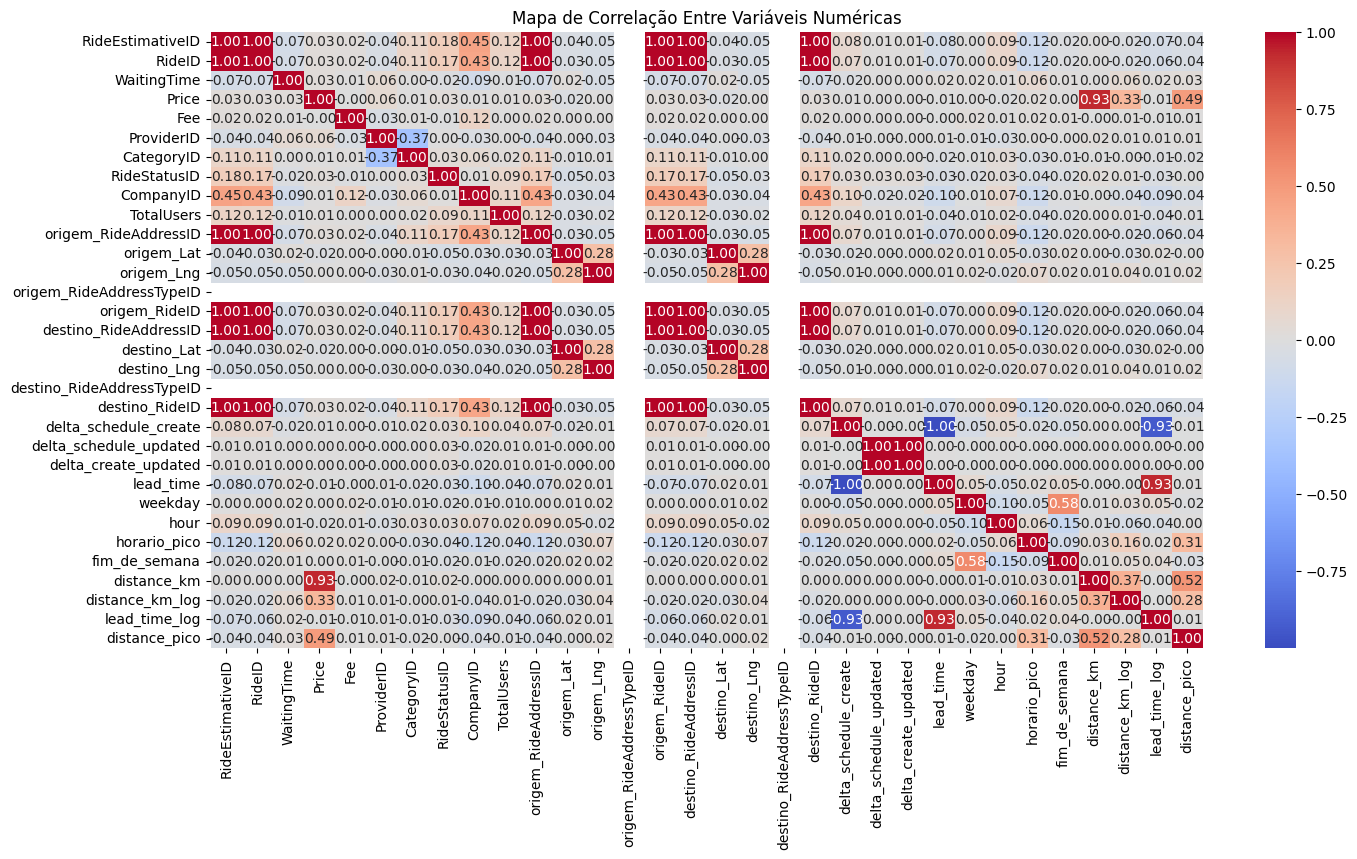

In [7]:
# Filtrando apenas colunas numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
corr = numericas.corr()

# Plot do heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Correlação Entre Variáveis Numéricas')
plt.show()

## Modelo

## Uber

------- Uber -------- ProviderID = 2 ------- 

ProductID únicos: ['ACCESS' 'Bag' 'Berline' 'Bike Rack' 'Black' 'Black Bag' 'BlackBag' 'BlackSUV' 'CentralBlack' 'CentralComfort' 'CentralComfortPlanet' 'CentralFlash' 'CentralFlash+' 'CentralFlashMoto' 'CentralPrioridade' 'CentralUberEspereeEconomize' 'CentralUberPlanet' 'CentralUberX' 'CentralVIP' 'Comfort' 'Comfort Planet' 'ComfortAeropuerto' 'ComfortElectric' 'ComfortPlanet' 'Economy' 'Essential' 'Flash' 'Flash Bikes' 'Flash Moto' 'Flash Saver' 'Flash+' 'FlashEconomize' 'FlashMoto' 'Green' 'JUMP Scooter' 'Moto' 'Moto Flash' 'Premier' 'Prioridade' 'Priority' 'Priroidade' 'PTaxi' 'Select' 'Taxi' 'Táxi' 'Taxi Promo' 'Táxi Promo' 'TaxiExtra' 'TaxiPrecioCerrado' 'TáxiPromo' 'Uber Flash' 'Uber Planet' 'Uber Priority' 'Uber Promo' 'UberAirport' 'UberEspereeEconomize' 'UberFlash' 'UberforUkraine' 'UberGreen' 'UberMedics' 'UberPet' 'UberPlanet' 'UberPriority' 'UberPromo' 'UberSUV' 'UberTuk' 'UberX' 'UberX Priority' 'UberX Promo' 'UberX Sem Pressa' 'UberXDiamond' 'UberXL' 'UberXPriority' 'UberXPromo' 'UberXSaver' 'UberXSCL' 'UberXVIP' 'UberYa' 'UberYaPromo' 'Van' 'VIP' 'VoucherBlack' 'VoucherBlackBag' 'VoucherComfort' 'VoucherComfortPlanet' 'VoucherFlash' 'VoucherPrioridade' 'VoucherTáxiPromo' 'VoucherUberX' 'VoucherVIP'] 

CategoryID únicos: [ 1 9 4 8 2 10 5] 

Description únicos: ['ACCESS' 'Bag' 'Berline' 'Bike Rack' 'Black' 'Black Bag' 'BlackBag' 'BlackSUV' 'CentralBlack' 'CentralComfort' 'CentralComfortPlanet' 'CentralFlash' 'CentralFlash+' 'CentralFlashMoto' 'CentralPrioridade' 'CentralUberEspereeEconomize' 'CentralUberPlanet' 'CentralUberX' 'CentralVIP' 'Comfort' 'Comfort Planet' 'ComfortAeropuerto' 'ComfortElectric' 'ComfortPlanet' 'Economy' 'Essential' 'Flash' 'Flash Bikes' 'Flash Moto' 'Flash Saver' 'Flash+' 'FlashEconomize' 'FlashMoto' 'Green' 'JUMP Scooter' 'Moto' 'Moto Flash' 'Premier' 'Prioridade' 'Priority' 'Priroidade' 'PTaxi' 'Select' 'Taxi' 'Táxi' 'Taxi Promo' 'Táxi Promo' 'TaxiExtra' 'TaxiPrecioCerrado' 'TáxiPromo' 'Uber Flash' 'Uber Planet' 'Uber Priority' 'Uber Promo' 'UberAirport' 'UberEspereeEconomize' 'UberFlash' 'UberforUkraine' 'UberGreen' 'UberMedics' 'UberPet' 'UberPlanet' 'UberPriority' 'UberPromo' 'UberSUV' 'UberTuk' 'UberX' 'UberX Priority' 'UberX Promo' 'UberX Sem Pressa' 'UberXDiamond' 'UberXL' 'UberXPriority' 'UberXPromo' 'UberXSaver' 'UberXSCL' 'UberXVIP' 'UberYa' 'UberYaPromo' 'Van' 'VIP' 'VoucherBlack' 'VoucherBlackBag' 'VoucherComfort' 'VoucherComfortPlanet' 'VoucherFlash' 'VoucherPrioridade' 'VoucherTáxiPromo' 'VoucherUberX' 'VoucherVIP']

In [21]:
# Filtrar dados somente para as categorias relevantes: UberX, Comfort, Black
uber_categories = ['UberX', 'Comfort', 'Black']
df_uber = df[df['ProductID'].isin(uber_categories)]

In [22]:
# Seleção de Features e Target (Price)
features = [
    'distance_km', 'distance_pico', 'distance_km_log'
]

# Dividir dados por categoria
dfs = {}
for category in uber_categories:
    dfs[category] = df_uber[df_uber['ProductID'] == category]

# Divisão em treino e teste para cada categoria e normalização dos dados
datasets = {}
for category, data in dfs.items():
    X = data[features]
    y = data['Price']

    # Normalizar
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    datasets[category] = (X_train, X_test, y_train, y_test)

In [23]:
# Resultados de desempenho para cada categoria
results = {}

for category, (X_train, X_test, y_train, y_test) in datasets.items():
    # Instanciar o modelo
    model = LinearRegression()
    model.fit(X_train, y_train)  # Treinar o modelo
    
    # Fazer previsões
    y_pred = model.predict(X_test)
    
    # Calcular métricas de desempenho
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Salvar resultados
    results[category] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    print(f"{category}: MAE = {mae:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.2f}")

UberX: MAE = 7.04, RMSE = 12.53, R2 = 0.70
Comfort: MAE = 10.94, RMSE = 19.45, R2 = 0.69
Black: MAE = 8.28, RMSE = 13.28, R2 = 0.88


Outliers

In [33]:
# Função para tratar outliers
def tratar_outliers(df, colunas):
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Categorias da Uber
uber_categories = ['UberX', 'Comfort', 'Black']
df_uber = df[df['ProductID'].isin(uber_categories)]

# Features e Target
features = ['distance_km', 'distance_pico', 'distance_km_log']
target = 'Price'

# Dicionário para salvar resultados
results = {}

# Loop por categoria
for category in uber_categories:
    print(f"\n--- Treinando para a categoria: {category} ---")
    
    # Filtrar dados para a categoria atual
    df_category = df_uber[df_uber['ProductID'] == category]
    
    # Remover outliers
    df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico'])
    
    # Divisão em X (features) e y (target)
    X = df_category[features]
    y = df_category[target]
    
    # Normalizar os dados
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Modelos
    modelos = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }
    
    # Avaliar modelos
    category_results = {}
    for nome_modelo, modelo in modelos.items():
        print(f"\nTreinando {nome_modelo} para {category}...")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Métricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        print(f"{nome_modelo} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
        
        # Salvar resultados
        category_results[nome_modelo] = {
            'model': modelo,
            'mae': mae,
            'rmse': rmse,
            'r2': r2
        }
    
    # Armazenar resultados da categoria
    results[category] = category_results


--- Treinando para a categoria: UberX ---

Treinando Regressão Linear para UberX...
Regressão Linear - MAE: 5.08, RMSE: 7.18, R²: 0.63

Treinando Random Forest para UberX...
Random Forest - MAE: 3.71, RMSE: 5.92, R²: 0.75

Treinando MLP Regressor para UberX...
MLP Regressor - MAE: 5.06, RMSE: 7.14, R²: 0.64

--- Treinando para a categoria: Comfort ---

Treinando Regressão Linear para Comfort...
Regressão Linear - MAE: 7.77, RMSE: 11.22, R²: 0.66

Treinando Random Forest para Comfort...
Random Forest - MAE: 5.60, RMSE: 9.33, R²: 0.77

Treinando MLP Regressor para Comfort...
MLP Regressor - MAE: 7.70, RMSE: 11.16, R²: 0.67

--- Treinando para a categoria: Black ---

Treinando Regressão Linear para Black...
Regressão Linear - MAE: 6.88, RMSE: 10.01, R²: 0.86

Treinando Random Forest para Black...
Random Forest - MAE: 4.49, RMSE: 7.77, R²: 0.91

Treinando MLP Regressor para Black...
MLP Regressor - MAE: 6.75, RMSE: 9.90, R²: 0.86


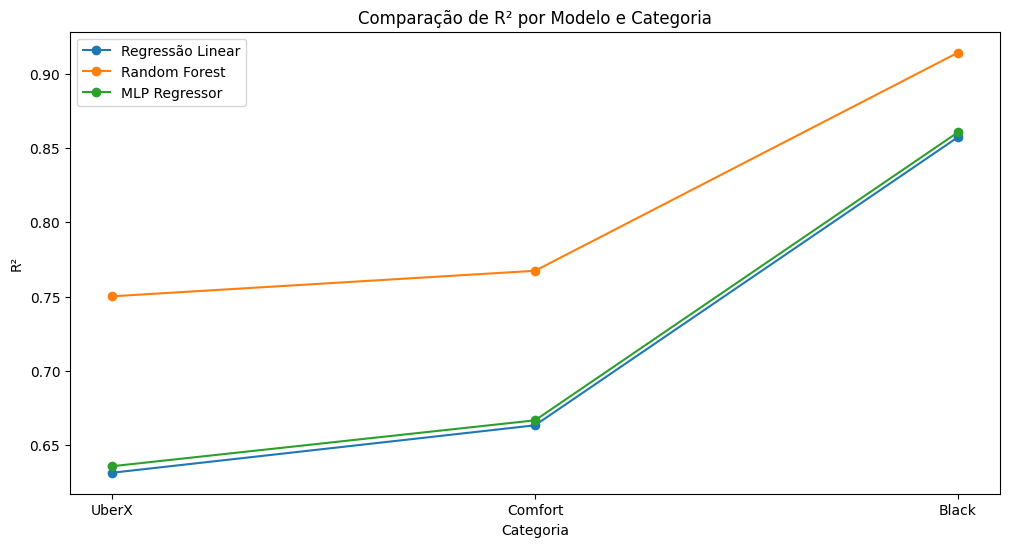

In [34]:
# Comparar as métricas
model_names = ['Regressão Linear', 'Random Forest', 'MLP Regressor']
categories = uber_categories

# Comparação de R² para cada modelo por categoria
r2_comparison = {model: [results[cat][model]['r2'] for cat in categories] for model in model_names}

plt.figure(figsize=(12, 6))
for model_name, r2_values in r2_comparison.items():
    plt.plot(categories, r2_values, marker='o', label=model_name)

plt.title('Comparação de R² por Modelo e Categoria')
plt.xlabel('Categoria')
plt.ylabel('R²')
plt.legend()
plt.show()

## 99

------- 99 -------- ProviderID = 3 -------
ProductID únicos: ['99POP' '99COMFORT' '99ENTREGA' '99ENTREGA MOTO' '99ENTREGAMOTO' '99PLUS'
 '99POUPA' '99TAXI ' '99TOP' 'comfort99' 'delivery99' 'delivery-moto99'
 'electric99' 'entrega-carreto' 'entrega-utility' 'entrega-van' 'moto99'
 'pop99' 'poupa99' 'REGULAR TAXI' 'regular-taxi' 'top99' 'turbo-taxi']

CategoryID únicos: [ 1  9 10  2  5  6]

Description únicos: ['99POP' '99COMFORT' '99ENTREGA' '99ENTREGA MOTO' '99ENTREGAMOTO' '99PLUS'
 '99POUPA' '99TAXI ' '99TOP' '99DELIVERY' '99DELIVERY MOTO'
 '99Electric-Pro' 'EntregaCarreto' 'EntregaUtility' 'EntregaVan' '99MOTO'
 'REGULAR TAXI' 'Táxi Comum' '99TAXI']

In [41]:
# Função para tratar outliers
def tratar_outliers(df, colunas):
    df_out = df.copy()
    for coluna in colunas:
        Q1 = df_out[coluna].quantile(0.25)
        Q3 = df_out[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[coluna] >= limite_inferior) & (df_out[coluna] <= limite_superior)]
    return df_out

# Categorias da Uber
categories_99 = ['pop99', 'comfort99', 'top99']
df_99 = df[df['ProductID'].isin(categories_99)]

# Features e Target
features = ['distance_km', 'distance_pico', 'distance_km_log']
target = 'Price'

# Dicionário para salvar resultados
results = {}

# Loop por categoria
for category in categories_99:
    print(f"\n--- Treinando para a categoria: {category} ---")
    
    # Filtrar dados para a categoria atual
    df_category = df_99[df_99['ProductID'] == category]
    
    # Remover outliers
    df_category = tratar_outliers(df_category, ['Price', 'distance_km', 'distance_pico'])
    
    # Divisão em X (features) e y (target)
    X = df_category[features]
    y = df_category[target]
    
    # Normalizar os dados
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Modelos
    modelos = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }
    
    # Avaliar modelos
    category_results = {}
    for nome_modelo, modelo in modelos.items():
        print(f"\nTreinando {nome_modelo} para {category}...")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Métricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        print(f"{nome_modelo} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
        
        # Salvar resultados
        category_results[nome_modelo] = {
            'model': modelo,
            'mae': mae,
            'rmse': rmse,
            'r2': r2
        }
    
    # Armazenar resultados da categoria
    results[category] = category_results


--- Treinando para a categoria: pop99 ---

Treinando Regressão Linear para pop99...
Regressão Linear - MAE: 6.58, RMSE: 9.32, R²: 0.56

Treinando Random Forest para pop99...
Random Forest - MAE: 5.10, RMSE: 8.22, R²: 0.66

Treinando MLP Regressor para pop99...
MLP Regressor - MAE: 6.43, RMSE: 9.30, R²: 0.57

--- Treinando para a categoria: comfort99 ---

Treinando Regressão Linear para comfort99...
Regressão Linear - MAE: 8.83, RMSE: 12.18, R²: 0.55

Treinando Random Forest para comfort99...
Random Forest - MAE: 6.32, RMSE: 10.29, R²: 0.68

Treinando MLP Regressor para comfort99...
MLP Regressor - MAE: 8.78, RMSE: 12.14, R²: 0.55

--- Treinando para a categoria: top99 ---

Treinando Regressão Linear para top99...
Regressão Linear - MAE: 10.87, RMSE: 14.83, R²: 0.80

Treinando Random Forest para top99...
Random Forest - MAE: 6.48, RMSE: 11.46, R²: 0.88

Treinando MLP Regressor para top99...
MLP Regressor - MAE: 10.66, RMSE: 14.64, R²: 0.80


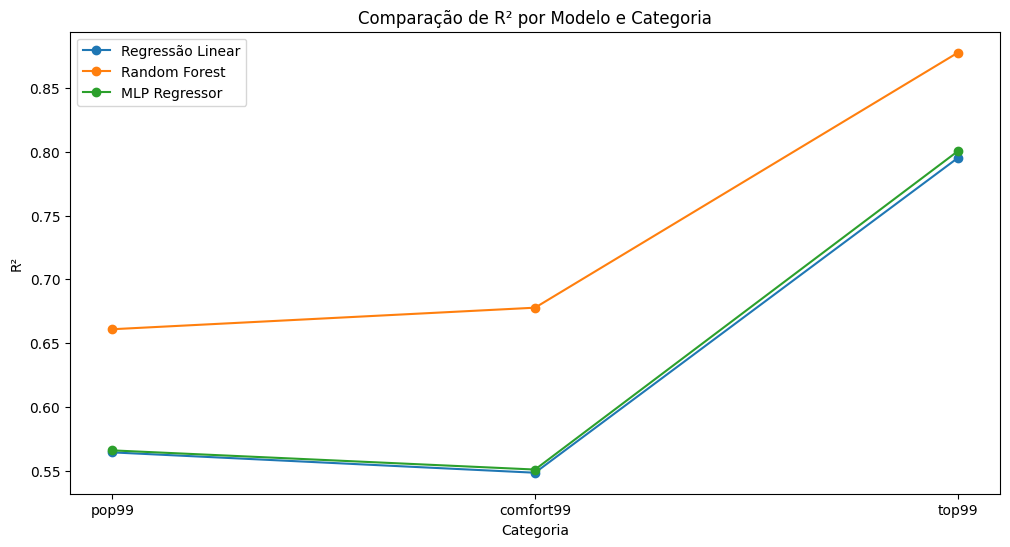

In [42]:
# Comparar as métricas
model_names = ['Regressão Linear', 'Random Forest', 'MLP Regressor']
categories = categories_99

# Comparação de R² para cada modelo por categoria
r2_comparison = {model: [results[cat][model]['r2'] for cat in categories] for model in model_names}

plt.figure(figsize=(12, 6))
for model_name, r2_values in r2_comparison.items():
    plt.plot(categories, r2_values, marker='o', label=model_name)

plt.title('Comparação de R² por Modelo e Categoria')
plt.xlabel('Categoria')
plt.ylabel('R²')
plt.legend()
plt.show()

## Próximos passos
- Validação Cruzada
- Outras Features
- Outros modelos
- Comparação: Uber x 99